Data loaded: (5572, 2)
     label                                               text
2103   ham                           Audrie lousy autocorrect
221    ham                          Ok no prob. Take ur time.
1086   ham  FR'NDSHIP is like a needle of a clock. Though ...

--- Evaluation ---
Accuracy: 0.963
Confusion Matrix:
 [[967   1]
 [ 40 107]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       968
        spam       0.99      0.73      0.84       147

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



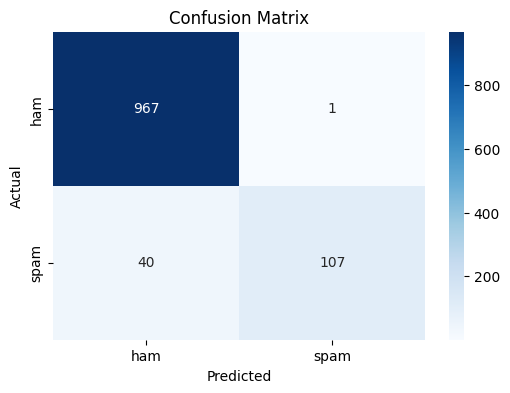


--- Sample Predictions ---
'Free entry in 2 a wkly comp to win FA Cup final!' -> spam
'England v Macedonia - don't miss the goals/team news.' -> ham
'Congratulations! You've won a $1000 Walmart gift card.' -> ham
'Are we meeting for lunch tomorrow?' -> ham


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# load dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/sms.tsv"
df = pd.read_csv(url, sep="\t", names=["label", "text"])

print("Data loaded:", df.shape)
print(df.sample(3))   # quick look at a few rows


# separate features and target
messages = df["text"]
labels = df["label"]

# TF-IDF vectorizer (remove english stopwords)
tfidf = TfidfVectorizer(stop_words="english")
X = tfidf.fit_transform(messages)

# train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, labels, test_size=0.2, random_state=7
)

# model training
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# predictions
y_pred = nb_model.predict(X_test)

print("\n--- Evaluation ---")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


# confusion matrix heatmap
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


def classify_message(text):
    vec = tfidf.transform([text])
    return nb_model.predict(vec)[0]


# sample messages
print("\n--- Sample Predictions ---")
sample_msgs = [
    "Free entry in 2 a wkly comp to win FA Cup final!",
    "England v Macedonia - don't miss the goals/team news.",
    "Congratulations! You've won a $1000 Walmart gift card.",
    "Are we meeting for lunch tomorrow?"
]

for m in sample_msgs:
    print(f"'{m}' -> {classify_message(m)}")
